In [1]:
## Provide a wider display for easier viewing
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, StratifiedKFold, KFold
from sklearn.metrics import *
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler

# Question 1

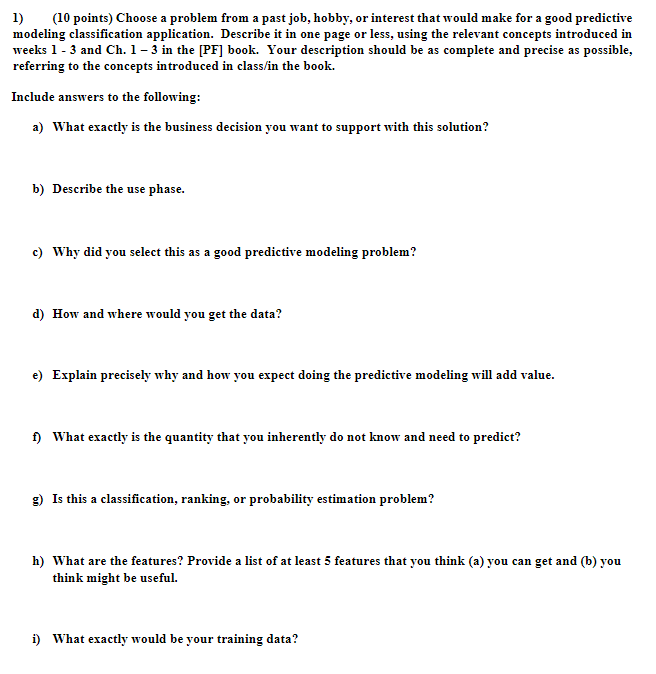

#### A.

I will be using an example from an old work project that I began while I was working as a data analyst at Indeed.com.  A manager of a Client Services team for the North American market wanted to determine how well his customer service representatives were performing their job.  The business decision that was going to be supported with this solution was determining who were the underperforming customer representatives to either: a) improve their "scores" or b) remove them.  In addition, the hope was to determine WHY they were underperforming - was it due to a lack of appropriate training, lack of understanding of the product / website, or some other determining factor that no one at the company had encountered before.

#### B.

The **use phase** is when a model is applied to a new, unseen cases and generates a probability estimate or classification.  For this particular business problem, the use phase would be to provide an estimate for a customer service's representatives **average Net Promoter Score**, based on their client base, their length of employment, their level of training, and their "knowledge" of Indeed's service offerings.<Br>
    
The reason that we are choose Net Promoter Score is because it is an industry standard measurement for determinig a customer's experience with your product/tool, and helps predict business growth.  This metric transformed the business world by provided a simple calculation using a simple question: *On a scale from 0-10, how likely is it that you would recommend this brand to a friend or colleague?*.  Respondents are grouped as follows:<br>

* Promoters (score 9-10): Loyal customers who will keep buying and refer others.
* Passives (score 7-8): Satisfied but unenthuastic customers who are vulnerable to competitive offerings.
* Detractors (score 0-6): Unhappy customers who can damage brand and impede growth through negative word-of-mouth.

The goal is to minimize the number of detractors to your business while maximizing your promoters (passives are neutral so you effectively factor them out unless they turn into a detractor).

#### C.

I selected this as a good predictive modeling problem because this was a real life scenario that required extracting different types of data for analysis (survey data, historical employee information, customer demographic information), building a pipeline for consuming/cleaning this data (ETL), building a predictive model after splitting into training and testing data (classification), and then making decisions from these predictions, decisions that were quite powerful.  If the manager of the Client Services team was able to determine his underperforming representatives, he could focus more resources (training, additional customer support scripts) on these representatives, while at the same time reaching out to his high performing representatives to ask them for insights of why they happen to be doing so well.

#### D.

The data would come from multiple sources that would internal to Indeed.  To gather historical Net Promoter Scores for each representative, we would be able to leverage surveys that were submitted to every customer following every interaction with a customer representative.  This survey would ask a few questions regarding that customer's (for Indeed a "customer" is anyone that placed a job posting on their site) experience, and it would include the question asking about how they felt on a scale from 0 to 10.  There would free text data to mine, and the score that the customer gave the rep.<br>

Training data for each representative would live in another data warehouse, and would just capture how many trainings the customer representative took outside of their initial training period (which was typically six months), what types of trainings the customer rep took, and their scores (if they were being evaluated by certain criteria).  This would not capture any external trainings or knowledge the customer rep had prior to being employed, which would have to be accounted for.<br>

Finally, we could capture their demographic information - what location they were in, how many clients they were serving, how long they had been with the company, what other roles they had served in previously (many of the representatives had worked as interns prior to be hired at the company).  This would be another set of data points that could provide clarity around why certain reps are under or overperforming.

#### E.

A predictive modeling approach would provide value because the business manager, prior to this request, would have NO idea how to distinguish between underperforming customer reps and reps who are doing extremely well.  The manager would have to aggregate all of the survey scores for each rep himself (whether it is manually going through survey results one by one or requesting a data dump of scores from the data warehouse), perform some summary statistics (getting the max score, the average score, getting averages by different groups, etc), and then make his decisions based on *historical* data.  He would not be able to *predict* how well a rep would do in any given scenario, nor would he be able to know why some reps are performing better than others.

#### F.

The quantity that we do not know is what a customer service representative's overall or average Net Promoter Score will be, based on historical information, their level of training, and their client base.  If we could classify "high" performing representatives (average NPS of 9 & 10) vs. "under" performing representatives (average NPS of 0 through 6).

#### G.

This, like many data science / real world business problems, is a combination of multiple problems.  It is a *classification* problem in the sense that we want distinguish between high performing representatives and under performing reps; what characteristics define each of the groups?<br>

Following the classification of the representatives, the second portion of this project would be to predict outcomes of either existing reps, or **new** representatives to the company.  This second component is where much of the business value comes from - for example, if a manager was taking over a group of representatives, would it not be extremely beneficial for that person to know who is in his area will do well and who is at risk for underperforming?

#### H.

The features that we could obtain for our predictive model are:

A.  Net Promoter Score (NPS) for customer interaction with rep (0 - 10)<br>
B.  Number of job postings that customer / client has posted (to determine size of client)<br>
C.  Number of trainings the customer representative took as part of their onboarding & how many trainings the customer rep took after their onboarding period.<br>
D.  Number of calls fielded per day by the customer representative (high volume leads to more practice or on the flip side, maybe that rep is drowning from having to respond to too many inquiries)<br>
E.  Length of employment (is there a point where too much experience is detrimental to a rep?  If they have been there too long, there is the chance that they are uninspired by their work and want to move on).<br>
F.  Demographic information about the rep (gender, age, satisification with their job)<br>

#### I.

Our training data in this business case would be all of the historical survey information for each customer service representative for each interaction they had with their clients, overlaid with the customer representative's demographic information, overlaid with the customer representative's training history.<br>

To provide a little more context, the survey data would contain the customer rep (an ID), the client (an ID), the survey text (what comments the client left about the interaction) and an Net Promoter Score.  This could be tied to a customer rep and department based on the customer rep ID, and could be tied to a client and their attributes based on the client ID.  The text data could be mined for frequently occurring words, and NPS would be as a target.<br>

The demographic information would be obtained from the Human Resources Management System (in this case, Workday), and would contain the employee's DOB (for age), ethnicity, legal sex, length of employment, and any workplace history; was this person reprimanded?  Does this representative has a history of poor performance?  All of this information could be obtained from an HRMS.  *One caveat: this requires that we mask the data so that an employee's demographic information is not easily accessible - but would be needed for the manager so they could identify their employee*.<br>

Finally, the customer representatives' training history could be obtained from the Training Hub (in Indeed's case, it was called Indeed University).  The system would have the customer rep (an ID), and a history of what trainings they took during their first six months of employment (their onboarding period) and then the history of training after this period.  We could also obtain what exactly subject matter was covered during this training (and could be encoded as categorical data).

# Question 2

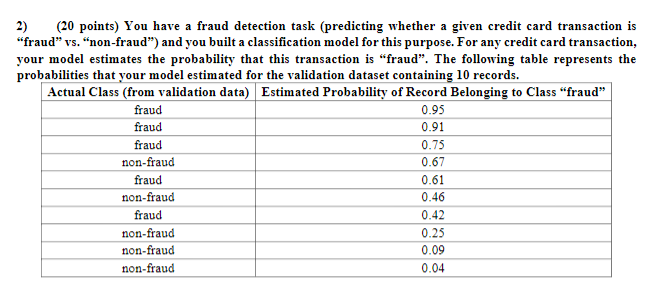

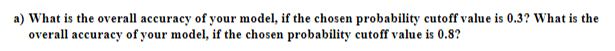

In [3]:
## Put my labels in an array
y_true = np.array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0])

## Put my probabilities in an array
y_probs = np.array([0.95, 0.91, 0.75, 0.67, 0.61, 0.46, 0.42, 0.25, 0.09, 0.04])

## Create thresholds to build out confusion matrix
thresholds = np.linspace(0, 1.0, num=21)

index = 0

## Generate confusion matrices for different probabilities
for t in thresholds:
    
    predict_thre = np.where(y_probs > t, 1, 0)  ## prediction based on the preset threshold
    clf_matrix = confusion_matrix(y_true, predict_thre)
    print("{}, Threshold {}".format(clf_matrix.T, t))

[[0 0]
 [5 5]], Threshold 0.0
[[1 0]
 [4 5]], Threshold 0.05
[[2 0]
 [3 5]], Threshold 0.1
[[2 0]
 [3 5]], Threshold 0.15000000000000002
[[2 0]
 [3 5]], Threshold 0.2
[[3 0]
 [2 5]], Threshold 0.25
[[3 0]
 [2 5]], Threshold 0.30000000000000004
[[3 0]
 [2 5]], Threshold 0.35000000000000003
[[3 0]
 [2 5]], Threshold 0.4
[[3 1]
 [2 4]], Threshold 0.45
[[4 1]
 [1 4]], Threshold 0.5
[[4 1]
 [1 4]], Threshold 0.55
[[4 1]
 [1 4]], Threshold 0.6000000000000001
[[4 2]
 [1 3]], Threshold 0.65
[[5 2]
 [0 3]], Threshold 0.7000000000000001
[[5 3]
 [0 2]], Threshold 0.75
[[5 3]
 [0 2]], Threshold 0.8
[[5 3]
 [0 2]], Threshold 0.8500000000000001
[[5 3]
 [0 2]], Threshold 0.9
[[5 5]
 [0 0]], Threshold 0.9500000000000001
[[5 5]
 [0 0]], Threshold 1.0


In [6]:
# Accuracy: ( TP + TN ) / ( P + N )

tp = 3
tn = 5
obvs = 10

print("The overall accuracy of your model, if the chosen probability is 0.3, is {}.".format((tp+tn)/obvs))
print()

tp = 5
tn = 2
obvs = 10

print("The overall accuracy of your model, if the chosen probability is 0.8, is {}.".format((tp+tn)/obvs))

The overall accuracy of your model, if the chosen probability is 0.3, is 0.8.

The overall accuracy of your model, if the chosen probability is 0.8, is 0.7.


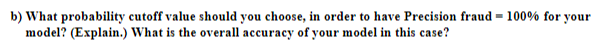

In [5]:
# TP - upper left, FN - lower left, FP - upper right, TN - lower right
# Precision = TP / ( TP + FP )
# Accuracy: ( TP + TN ) / ( P + N )


## Based on the matrices above, I would set the probability cutoff to 0.75 to reach Precision of 100%.
## This would then mean:

tp = 5
tn = 2
obvs = 10

print("The overall accuracy of your model, at the probability cutoff of 0.75, is {}".format((tp+tn)/obvs))

The overall accuracy of your model, at the probability cutoff of 0.75, is 0.7


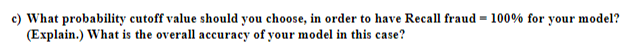

In [6]:
# TP - upper left, FN - lower left, FP - upper right, TN - lower right
# Recall = TP / ( TP + FN )
# Accuracy: ( TP + TN ) / ( P + N )

## Based on the matrices above, I would set the probability cutoff to 0.7 to reach Recall of 100%.
## This would then mean:

tp = 5
tn = 0
obvs = 10

print("The overall accuracy of your model, at the probability cutoff of 0.91, is {}".format((tp+tn)/obvs))

The overall accuracy of your model, at the probability cutoff of 0.91, is 0.5


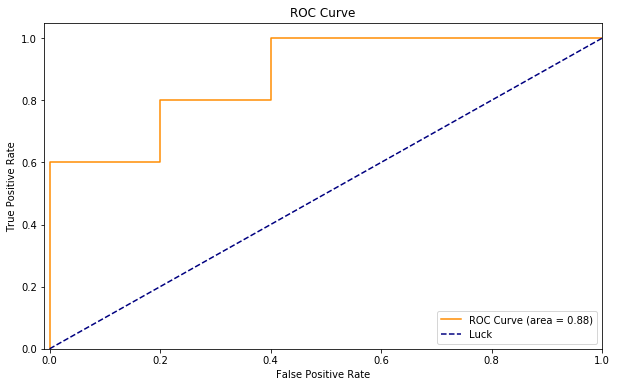

In [8]:
## Import the libraries need for drawing the ROC Curve
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

## Put my labels in an array
y_true = np.array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0])

## Put my probabilities in an array
y_probs = np.array([0.95, 0.91, 0.75, 0.67, 0.61, 0.46, 0.42, 0.25, 0.09, 0.04])

## Calculate my false positive rate, true positive rate for each threshold
## My positive label is 1
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_probs, pos_label = 1)

## Calculate the overall AUC for the model
auc = np.trapz(tpr, fpr)

## Create a new figure to plot
plt.figure(figsize= (10, 6))

lw = 2

## Draw the line for my fpr and tpr
plt.plot(fpr, tpr, color = 'darkorange',
        label = 'ROC Curve (area = %0.2f)' % auc)

## Put in a line to demonstrate blind luck 
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--', label = 'Luck')

## Set the limits of the plot for better visualization
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
         
## Set labels for x and y
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## Set a title and legend
plt.title('ROC Curve')
plt.legend(loc = 'lower right')

## Show the curve!
plt.show()

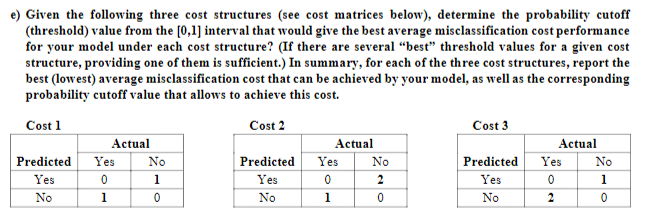

In [4]:
## Put my labels in an array
y_true = np.array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0])

## Put my probabilities in an array
y_probs = np.array([0.95, 0.91, 0.75, 0.67, 0.61, 0.46, 0.42, 0.25, 0.09, 0.04])

In [5]:
## Initialize different thresholds and Costs that will be tied to those thresholds
thresholds = np.linspace(0, 1.0, num=21)

## Generate three generic Cost List for each matrix
Cost_List1=np.linspace(0, 1.0, num=21)
Cost_List2=np.linspace(0, 1.0, num=21)
Cost_List3=np.linspace(0, 1.0, num=21)

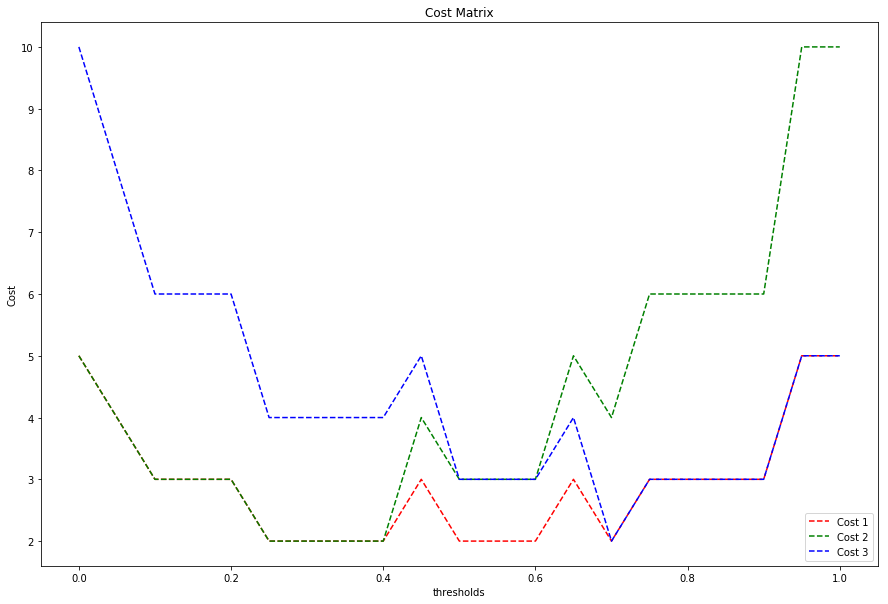

In [8]:
## Build first cost matrix
cost1_matrix = np.array([[0, 1], [1, 0]])
## Build second cost matrix
cost2_matrix = np.array([[0, 2], [1, 0]])
## Build the third cost matrix
cost3_matrix = np.array([[0, 1], [2, 0]])

index = 0

for t in thresholds:
    
    predict_thre = np.where(y_probs > t, 1, 0)  ## prediction based on the preset threshold
    clf_matrix = confusion_matrix(y_true, predict_thre).T
    Cost_List1[index] = clf_matrix[0][0]*cost1_matrix[0][0] +clf_matrix[0][1]*cost1_matrix[0][1] +clf_matrix[1][0]*cost1_matrix[1][0] +clf_matrix[1][1]*cost1_matrix[1][1]
    Cost_List2[index] = clf_matrix[0][0]*cost2_matrix[0][0] +clf_matrix[0][1]*cost2_matrix[0][1] +clf_matrix[1][0]*cost2_matrix[1][0] +clf_matrix[1][1]*cost2_matrix[1][1]
    Cost_List3[index] = clf_matrix[0][0]*cost3_matrix[0][0] +clf_matrix[0][1]*cost3_matrix[0][1] +clf_matrix[1][0]*cost3_matrix[1][0] +clf_matrix[1][1]*cost3_matrix[1][1]
    index+=1
    
## Set the figure size    
plt.figure(figsize= (15, 10))

## Plot each Cost Line individually
plt.plot(thresholds, Cost_List1, 'r--', label = "Cost 1")
plt.plot(thresholds, Cost_List2, 'g--', label = "Cost 2")
plt.plot(thresholds, Cost_List3, 'b--', label = "Cost 3")

## Give some labels
plt.xlabel("thresholds")
plt.ylabel("Cost")

## Title and legend
plt.title("Cost Matrix")
plt.legend(loc = 'lower right')

## Show the Cost Matrix Analysis
plt.show()

In [18]:
## Show the lowest average misclassification cost performance for each model for the given Cost Models
print(min(Cost_List1))
print()
print(min(Cost_List2))
print()
print(min(Cost_List3))

2.0

2.0

2.0


Based on the plot above, you could set the thresholds at the following points:<br>

* Cost 1 (Green Line):  The lowest average misclassification cost performance for this model is 2.0; this could be achieved using a threshold of .7.
* Cost 2 (Red Line):  The lowest average misclassification cost performance for this model is 2.0; this could be achieved using a threshold of .7.
* Cost 3 (Blue Line):  The lowest average misclassification cost performance for this model is 2.0; this could be achieved using a threshold of .4.

# Question 3

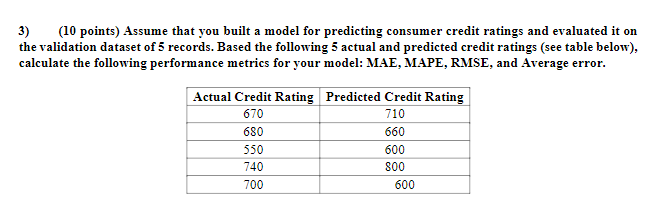

In [8]:
## Put all "Actual" Credit Ratings into variables
x1 = 670
x2 = 680
x3 = 550
x4 = 740
x5 = 700

## Put all "Predicted" Credit Ratings into variables
y1 = 710
y2 = 660
y3 = 600
y4 = 800
y5 = 600

# MAE - Mean Absolute Error

In [14]:
mae = (abs(y1 - x1) + abs(y2 - x2) + abs(y3 - x3) + abs(y4 - x4) + abs(y5 - x5)) / 5

print("The Mean Absolute Error is {}".format(mae))

The Mean Absolute Error is 54.0


# MAPE - Mean Absolute Percentage Error

In [16]:
mape = (abs((y1 - x1) / x1) + abs((y2 - x2) / x2) + abs((y3 - x3) / x3) + abs((y4 - x4) / x4) + abs((y5 - x5) / x5) ) / 5 * 100

print("The Mean Absolute Percentage Error is {}".format(mape))

The Mean Absolute Percentage Error is 8.079211441810212


# Root Mean Squared Error

In [21]:
rmse = (((y1 - x1) ** 2 + (y2 - x2) ** 2 + (y3 - x3) ** 2 + (y4 - x4) ** 2 + (y5 - x5) ** 2) / 5) ** .5

print("The Root Mean Squared Error is {}".format(rmse))

The Root Mean Squared Error is 60.166435825965294


# Average Error

In [23]:
avg_error = ((y1 - x1) + (y2 - x2) + (y3 - x3) + (y4 - x4) + (y5 - x5)) / 5

print("The Average Error is {}".format(avg_error))

The Average Error is 6.0


# Question 4

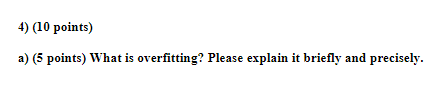

When designing an algorithm to perform classification or regression, there is the chance that you will find occurrences in data that look like interesting patterns but do not generalize; this is called *overfitting* the data.  All data mining procedures have the tendency to overfit to some extent, some more than others.<br>

*Generalization* refers to the property of a model or modeling process where the model applies to data that were **not** used to actually build the model.  In a case where you have developed a model that is "overfit", the model cannot generalize at all beyond the data that were used to build it.<br>

*Overfitting* is the tendency of data mining procedures to tailor models to training data, at the expense of generalization to any unseen data points.  For example, if you train a model so well on the training data that it can accurately predict churn, or label a malignant tumor with 100% accuracy every single time you run the analysis, there is very good likelihood that your model is overfit because it is essentially making ZERO mistakes, and not accounting for any errors or noise in the data.<br>

The answer to this dilemma is not to skip using data mining procedures that don't overfit because they all do, nor is the answer to simply use models that produce less overfitting because of the trade-off between model complexity and possibility of overfitting.  The best strategy is to recognize overfitting and manage complexity in a principled way.

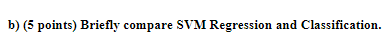

**Support-vector machines** are supervised learning models with associated learning algorithms that analyze data for *classification* and *regression* analyis.  An SVM model is a representation of these examples as points in a 3-D dimensional plane, mapping them so that each example of the separate categories is divided by a clear gap that is as **wide as possible** - the reason we want the gap as wide is possible is so that we can **accurately** distinguish between the two groups.<br>

**SVM Classification** is when a SVM training algorithm is presented with a set of training examples, which are marked with one or the other of two categories, it will build a model that assigns new data points to one category or the other, making it a non-probabilistic binary linear *classifier*.  Once the SVM model has been trained with training data, the algorithm will output an optimal hyperplane that will categorize new examples.<br>

**SVM Regression** borrows from SVM Classification, but with a few twists/differences.  It constructs a hyperplane, and plots the nodes around the hyperplane.  However, in regression, our output is a **number** (a probability) which becomes very difficult to predict with the information available from our training data set, which has infinite possibilites.  A margin of tolerance (which would be represented by *epsilon*) is set in approximation to the SVM model.  However, the main ideas stay the same: minimize error, individualize the hyperplane which maximizes the margin, and keep in mind that part of the error is tolerated.

# Question 5

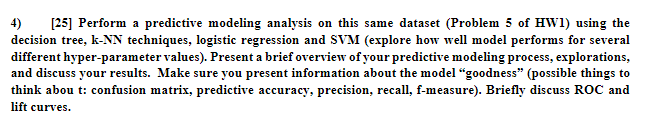

# 1.  Pre-process data and get it ready for our modeling tools

In [19]:
## Create label columns for our data set since they don't come in with labels
features = ["radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", "concave_points",
           "symmetry", "fractal_dimension"]

## start with the first two column names, id and diagnosis
colnames = ["id", "diagnosis"]

## For each feature, we have the mean, standard error, and worst of each observation
## so we have to add each of these labels
for item in features:
    colnames.append("mean_" + item)
for item in features:
    colnames.append(item + "_se")
for item in features:
    colnames.append("worst_" + item)

In [20]:
## Read in our data set using pandas, and give the appropriate column names
wdbc = pd.read_csv("wdbc.data", header = None, names = colnames)

In [21]:
# create our target variable - make it binary since right now it is categorical - we will need this for the classifiers down below
wdbc["target"] = np.where(wdbc["diagnosis"] == 'M', 1, 0)

## look at our data, to get a sense of what is included - 
## we have a lot of parameters to work with, we will likely only need a few - more observations may lead to more noise.
wdbc.head()

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [22]:
## What are our classes?  What are we trying to predict?
print(wdbc.diagnosis.unique())
print()
print("Two types of diagnoses - B = benign, M = malignant")

['M' 'B']

Two types of diagnoses - B = benign, M = malignant


In [23]:
## What are their splits?  How many of each?
## Just checking to see if the data set is skewed one way or the other - looks like a 2/3 split which should be ok
total_obvs = wdbc.groupby("diagnosis")["id"].count().sum()
total_benign = wdbc.groupby("diagnosis")["id"].count()[0]
total_malignant = wdbc.groupby("diagnosis")["id"].count()[1]

print("{} total benign observations, \
      {} % of overall observations".format(total_benign, round(total_benign/total_obvs*100, 2)))
print("{} total malignant observations, \
      {} % of overall observations".format(total_malignant, round(total_malignant/total_obvs*100, 2)))

357 total benign observations,       62.74 % of overall observations
212 total malignant observations,       37.26 % of overall observations


In [24]:
## Remove any columns that aren't features
feature_cols = wdbc.columns[~wdbc.columns.isin(['id', 'diagnosis', 'target'])]
## Grabbing all the features available
X = np.array(wdbc[feature_cols])
## Define my target variable - which I created a little bit ago
y = np.array(wdbc["target"])

## Create splits of the data to starting training models below, 70/30
## Random seed of 42 so that I can reproduce these results
## Stratify the samples because the splits are not the same
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42,
                                                                                   stratify = y) ## stratify the data

In [25]:
## We have quite a few different models to explore.  Here is where Nested Cross Validation helps choose the correct
## model for performance.

## Initialize different classification techniques - using default values

## Set a number for how many trials to conduct
num_trials = 20

## Create a Support Vector Classifier with "rbf" kernel
svm1 = svm.SVC(kernel = "rbf", gamma = "auto")

## Create a new k-NN Classifier
clf = neighbors.KNeighborsClassifier()

## Create a new DecisionTree Classifier
dt = tree.DecisionTreeClassifier()

## Create a new Linear Regression Model
lr = linear_model.LinearRegression()

In [26]:
## Empty arrays to store scores for classifier
nested_scores_svm = np.zeros(num_trials)
nested_scores_clf = np.zeros(num_trials)
nested_scores_dt = np.zeros(num_trials)
nested_scores_lr = np.zeros(num_trials)

## Loop for each trial
for i in range(num_trials):

    ## Choose cross-validation techniques for the inner and outer loops,
    ## independently of the dataset.
    outer_cv = KFold(n_splits=4, shuffle=True, random_state = i)

    ## Nested CV for SVM
    nested_score = cross_val_score(svm1, X = X_train, y = y_train, cv = outer_cv)
    nested_scores_svm[i] = nested_score.mean()
    
    ## Nested CV for kNN
    nested_score = cross_val_score(clf, X = X_train, y = y_train, cv = outer_cv)
    nested_scores_clf[i] = nested_score.mean()
    
    ## Nested CV for Decision Tree
    nested_score = cross_val_score(dt, X = X_train, y = y_train, cv = outer_cv)
    nested_scores_dt[i] = nested_score.mean()
    
    ## Nested CV for Logit Regression
    nested_score = cross_val_score(lr, X = X_train, y = y_train, cv = outer_cv)
    nested_scores_lr[i] = nested_score.mean()

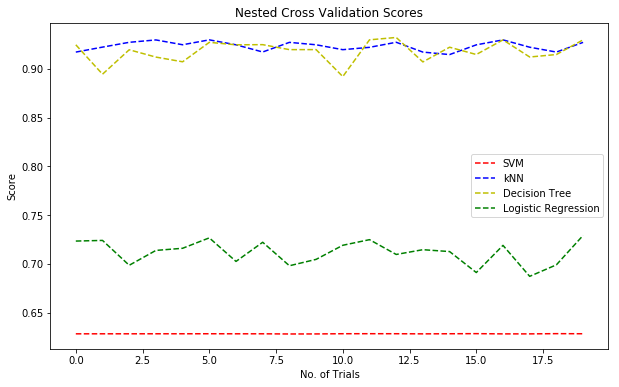

In [28]:
## Plot scores on each trial for nested CV

## Set the figure size    
plt.figure(figsize= (10, 6))

## Plot nested scores for each classifier - quickly visual the best performing model
## This is WITHOUT having changed any of the default parameters
plt.plot(nested_scores_svm, 'r--', label = "SVM")
plt.plot(nested_scores_clf, 'b--', label = "kNN")
plt.plot(nested_scores_dt, 'y--', label = "Decision Tree")
plt.plot(nested_scores_lr, 'g--', label = "Logistic Regression")

## Give some labels
plt.xlabel("No. of Trials")
plt.ylabel("Score")

## Title and legend
plt.title("Nested Cross Validation Scores")
plt.legend(loc = 'center right')

## Show the graph
plt.show()

Interesting!  From my first analysis of this data, I found LR to be pretty accurate - once I had tuned the hyperparameters.<br>

Using the plot above, I want to use kNN and Decision Tree as my two models, since the nested cross validation scores are very close over the course of twenty trials.<br>

I also realize that my SVM model might be performing poorly because I haven't normalized my data or tried slightly tuning certain parameters, but I will try practicing with this in a different analysis.

# A. Decision Tree - Round 2

In [70]:
## Create a new DecisionTree Classifier
dt = tree.DecisionTreeClassifier()

## Let's test for different criteria in our model so we can tune this before running it
## on the full data
param_grid = {"criterion": ["gini", "entropy"],
             "splitter": ["best", "random"],
             "max_depth": range(1, 15),
             "random_state": [42]
             }

## Use gridsearch to test all versions of the model, with 1000 fits.
dt_gscv = GridSearchCV(dt, param_grid, cv = 10)

## fit model to our training data
dt_gscv.fit(X_train, y_train)

C:\Python\envs\MSBA2020\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 15), 'random_state': [42],
  

In [71]:
## Get our best params and their scores
print(dt_gscv.best_params_)
print()

## Print out how well it performed using the best params
print(dt_gscv.best_score_)

## save our best params so we can use them in our actual DT model!
best_dt_params = dt_gscv.best_params_

{'criterion': 'gini', 'max_depth': 6, 'random_state': 42, 'splitter': 'random'}

0.9422110552763819


In [72]:
## Initialize our DecisionTree classifier with the best params based on our GridSearch. 
clf = tree.DecisionTreeClassifier(**best_dt_params)

## Train the model (fit the data)
# 'fit' builds a decision tree from the training set (X, y).
clf = clf.fit(X_train, y_train)

In [73]:
## Evaluate performance by cross-validation
scores = cross_val_score(clf, X_train, y_train, cv = 10)
print(scores)

# The mean score and the 95% confidence interval of our scores:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.975      0.975      1.         1.         0.925      0.9
 0.975      0.95       0.84615385 0.87179487]
Accuracy: 0.94 (+/- 0.10)


In [33]:
## Build a confusion matrix from our Decision Tree model - we want to see how accurate it is

## Try to predict the outcomes on our test data
predicted = clf.predict(X_test)

## Compare that with our ACTUAL values from the test data set
matrix = confusion_matrix(y_test, predicted)
print(matrix)
print()

## Create a report to show our precision(accuracy), recall, and f1 for predictions
report = classification_report(y_test, predicted)
print(report)

[[106   1]
 [  6  58]]

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       107
           1       0.98      0.91      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



# B. kNN - Round 2

In [60]:
## Save a version of a standardized test data to a new variable so that we don't overwrite our existing training set
## I will use this for kNN to so that weights between points are equally distributed
## I want to be able to replicate these results in future tests
X_train_knn = StandardScaler().fit_transform(X_train)

In [61]:
## Create a new kNN Classifier
knn = neighbors.KNeighborsClassifier()

## Let's test for a variety of different neighbors, from 1 to 30
## We will try different weights and algorithms as well
param_grid = {"n_neighbors": np.arange(1, 30),
             "weights": ["uniform", "distance"],
             "algorithm": ["ball_tree", "kd_tree", "brute"]
             }

## Use gridsearch to test all values for n_neighbors, with 1000 fits.
knn_gscv = GridSearchCV(knn, param_grid, cv = 10)

## fit model to our training data
knn_gscv.fit(X_train_knn, y_train)

C:\Python\envs\MSBA2020\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [62]:
## Print out what the best params is based on running GridSearch on the NORMALIZED training data
print(knn_gscv.best_params_)
print()

## Print out how well it performed using the best params
print(knn_gscv.best_score_)

## Save the params to a variable so we can use them in our model!
best_knn_params = knn_gscv.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 9, 'weights': 'uniform'}

0.9673366834170855


In [63]:
# create the kNN model
knnm = neighbors.KNeighborsClassifier(**best_knn_params)

## Train the model (fit the data) - now I run it with all of the NORMALIZED features 
knnm = knnm.fit(X_train_knn, y_train)

In [64]:
## Evaluate performance by cross-validation
scores = cross_val_score(knnm, X_train_knn, y_train, cv = 10)
print(scores)
print()

# The mean score and the 95% confidence interval for my kNN model, after being run through cv:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.975      0.975      0.975      1.         0.975      0.975
 0.975      1.         0.92307692 0.8974359 ]

Accuracy: 0.97 (+/- 0.06)


In [65]:
## Normalize our test data set - otherwise the predctions will be no good!  I learned this the hard way the first time
## trying to get the models to do accurate predictions.

## Save a version of the standardized test data to a new variable so that we don't overwrite our existing training set
X_test_knn = StandardScaler().fit_transform(X_test)

In [66]:
## Build a confusion matrix from our kNN model - we want to see how accurate it is
predicted = knnm.predict(X_test_knn)
matrix = confusion_matrix(y_test, predicted)
print(matrix)
print()

report = classification_report(y_test, predicted)
print(report)

[[106   1]
 [  6  58]]

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       107
           1       0.98      0.91      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



The Decision Tree and kNN models have the exact same performance working with the test data set.  Both models correctly identify 96% (106/107) of the benign cells, but only predicts the malignant accurately 97% (58/64) of the time.  Let's observe the area under the curve for each model.

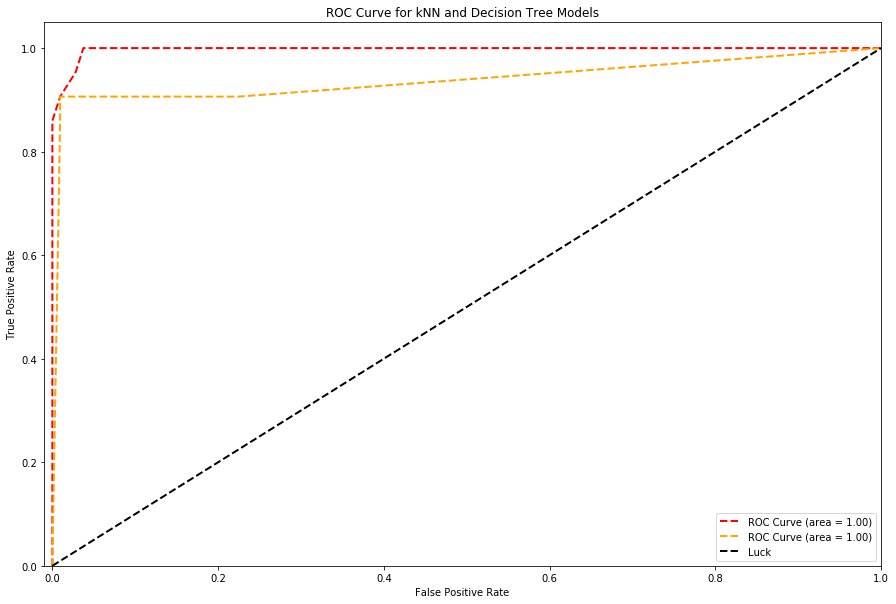

In [82]:
## Obtain my true labels from my test data set
y_true = y_test
y_true_dt = y_test

## Obtain my probabilities from fitting the training data on both models
y_probs = knnm.fit(X_train_knn, y_train).predict_proba(X_test_knn)[:, 1]
y_probs2 = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1]

## Calculate my false positive rate, true positive rate for each threshold
## My positive label is 1
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_probs, pos_label = 1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_true_dt, y_probs2, pos_label = 1)

## Calculate the overall AUC for both models
auc = np.trapz(tpr, fpr)
auc2 = np.trapz(tpr2, fpr2)

## Create a new figure to plot
plt.figure(figsize= (15, 10))

## Draw the line for my kNN Model
plt.plot(fpr, tpr, color = 'red', linestyle = '--', lw = 2,
        label = 'ROC Curve (area = %0.2f)' % auc)

## Draw the line for my Decision Tree Model
plt.plot(fpr2, tpr2, color = 'orange', linestyle = '--', lw = 2,
        label = 'ROC Curve (area = %0.2f)' % auc)

## Put in a line to demonstrate luck 
plt.plot([0, 1], [0, 1], color = 'black', lw = 2, linestyle = '--', label = 'Luck')

## Set the limits of the plot for better visualization
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
         
## Set labels for x and y
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## Set a title and legend
plt.title('ROC Curve for kNN and Decision Tree Models')
plt.legend(loc = 'lower right')

## Show the curve!
plt.show()

It makes sense that both of the ROC curves for these models would look relatively the same - the confusion matrix output tells me the models are very close.  When I look at the curve, I can see that the models are probably overfitted because of how "almost" perfect they look.  Therefore I will need to be cautious with using either model on a broader data set - they may perform very poorly with new data.

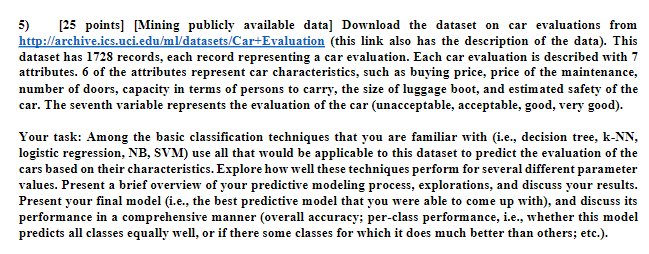

# 1. First steps are to do a little pre-processing of the data.

- Add column names
- Read in the data
- Make some initial observations about the data

In [3]:
# buying - buying price
# maint - price of maintenance
# doors - number of doors
# persons - car capacity
# lug_boot - size of luggage boot
# safety - estimated safety of car
# class - unacceptable, acceptable, good, very good

cars_colnames = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]

In [4]:
## Read in the data into a dataframe
cars_df = pd.read_csv("car.data", header = None, names = cars_colnames)

## Look at the first five rows to see how the data is structured
cars_df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
## What are their splits?  How many of each?
## Just checking to see if the data set is skewed one way or the other - looks like a 2/3 split which should be ok
total_obvs = cars_df.groupby("class")["doors"].count().sum()

## Build a dictionary of 
classes = dict(cars_df.groupby("class")["doors"].count().sort_values())

## Print out the number of observations for each class  and the percentage of total, to see if data is skewed
## There is a lot of unacceptable class observations, making up almost 70% of the data
## This data set is a great candidate for stratified sampling, so we're not heavily skewing our test/training data
for k,v in classes.items():
    print("Class {}: No. of observations {}, {}% of total".format(k, v, round(v/total_obvs*100, 3)))

Class vgood: No. of observations 65, 3.762% of total
Class good: No. of observations 69, 3.993% of total
Class acc: No. of observations 384, 22.222% of total
Class unacc: No. of observations 1210, 70.023% of total


In [87]:
## This data set is a good candidate for stratified sampling, GridSearch and Nested Cross Validation.

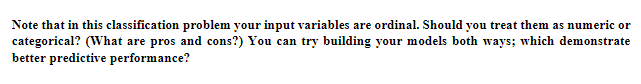

In [6]:
## Pull out my features columns
categ_vars = ["buying", "maint", "lug_boot", "safety", "doors", "persons"]

## Print summary statistics for each feature
for var in categ_vars:
    print(cars_df[var].value_counts())
    print()

low      432
vhigh    432
med      432
high     432
Name: buying, dtype: int64

low      432
vhigh    432
med      432
high     432
Name: maint, dtype: int64

med      576
big      576
small    576
Name: lug_boot, dtype: int64

low     576
med     576
high    576
Name: safety, dtype: int64

2        432
5more    432
4        432
3        432
Name: doors, dtype: int64

2       576
more    576
4       576
Name: persons, dtype: int64



They are all split evenly, which is pretty suprising - but hopefully useful for the model.<br>

For certain business problems we usually want a numerical prediction over a categorical target. For this analysis, we're not really trying to reach a prediction or probability, this is more of a multivariate classification problem.  We are trying to guess what a customer would say about a car based on the features of the car.<br>

We can treat them both as numeric / categorical, and determine which model performs better.

# 2. Develop model with features as categorical values

In [33]:
## There's a couple of different options for how to encode ordinal values.  I hope I am not ahead of the curve
## here.  One Hot encoding solves the problems of unequal weights given to categories within a feature, but this
## is not useful when there are many categories - this leads to many new columns, which can lead to the curse
## of dimensionality.

In [7]:
## First step: transform our target variable to numeric targets

## Create a dictionary for my target 'class'
class_dict = { 'unacc': 0,
               'acc': 1,
               'good': 2,
               'vgood': 3}

## Map this and create a new column on the df
cars_df['class_ordinal'] = cars_df['class'].map(class_dict)

## Show the output of the dataframe so I know that my mapping worked
cars_df.head(1)

,buying,maint,doors,persons,lug_boot,safety,class,class_ordinal
0,vhigh,vhigh,2,2,small,low,unacc,0


In [8]:
## For my categorical exploration, I will be using OneHotEncoder.  There's so many options that if I don't start
## with one, I will never actually do any analysis!

## import the library to encode the categorical vars in my data set.
import category_encoders as ce

## Create an instance of the OneHotEncoder
encoder = ce.OneHotEncoder()

## Transform my ENTIRE dataframe because even my target 'class' is a categorical
## We may have to change this if the model performs poorly.
cars_onehot_df = encoder.fit_transform(cars_df[categ_vars])

## We notice that our df suddenly exploded in width, with the addition of all the encoded columns
cars_onehot_df.head()

,buying_1,buying_2,buying_3,buying_4,maint_1,maint_2,maint_3,maint_4,lug_boot_1,lug_boot_2,...,safety_1,safety_2,safety_3,doors_1,doors_2,doors_3,doors_4,persons_1,persons_2,persons_3
0,1,0,0,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
1,1,0,0,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
2,1,0,0,0,1,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
3,1,0,0,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
4,1,0,0,0,1,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0


In [9]:
## Just confirming our features df and our target variables are the same length so that we didn't mess anything up
## in the transformation of the data.
print(len(cars_onehot_df))
print()
print(len(cars_df['class_ordinal']))

1728

1728


In [10]:
## Assign my features df, that has been encoded as a numpy array to X
X = np.array(cars_onehot_df)

## Assign my target vars as a numpy array to Y
y = np.array(cars_df['class_ordinal'])

In [11]:
## Create splits of the data to starting training models below, 70/30
## Random seed of 42 so that I can reproduce these results
## Stratify the splits because the classes are unbalanced (and I want to do this right!)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=42, stratify = y)

In [95]:
## We have quite a few different models to explore.  Here is where Nested Cross Validation helps choose the correct
## model for performance.

## Initialize different classification techniques - using default values

## Set a number for how many trials to conduct
num_trials = 20

## Create a Support Vector Classifier with "rbf" kernel
svm2 = svm.SVC(kernel = "rbf", gamma = "auto")

## Create a new k-NN Classifier
clf = neighbors.KNeighborsClassifier()

## Create a new DecisionTree Classifier
dt = tree.DecisionTreeClassifier()

## Create a new Linear Regression Model
lr = linear_model.LinearRegression()

## I am not setting any default values for this yet - this will help pick the best model
## Then I can focus on tuning the hyper parameters

In [96]:
## Empty arrays to store scores for classifier
nested_scores_svm = np.zeros(num_trials)
nested_scores_clf = np.zeros(num_trials)
nested_scores_dt = np.zeros(num_trials)
nested_scores_lr = np.zeros(num_trials)

## Loop for each trial
for i in range(num_trials):

    ## Run with StratifiedKFold technique because the class distributions are not even
    outer_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state = i)

    ## Nested CV for SVM
    nested_score = cross_val_score(svm2, X = X_train, y = y_train, cv = outer_cv)
    nested_scores_svm[i] = nested_score.mean()
    
    ## Nested CV for kNN
    nested_score = cross_val_score(clf, X = X_train, y = y_train, cv = outer_cv)
    nested_scores_clf[i] = nested_score.mean()
    
    ## Nested CV for Decision Tree
    nested_score = cross_val_score(dt, X = X_train, y = y_train, cv = outer_cv)
    nested_scores_dt[i] = nested_score.mean()
    
    ## Nested CV for Logit Regression
    nested_score = cross_val_score(lr, X = X_train, y = y_train, cv = outer_cv)
    nested_scores_lr[i] = nested_score.mean()

In [97]:
## Preview one of the outputs of the nested cross validation
nested_scores_clf

array([0.88504463, 0.87015206, 0.86850182, 0.87183206, 0.87924724,
       0.87268177, 0.86845248, 0.87760487, 0.88259926, 0.87507241,
       0.8891974 , 0.88915901, 0.88664828, 0.88421676, 0.88257462,
       0.883367  , 0.87510525, 0.87759128, 0.87264904, 0.87507511])

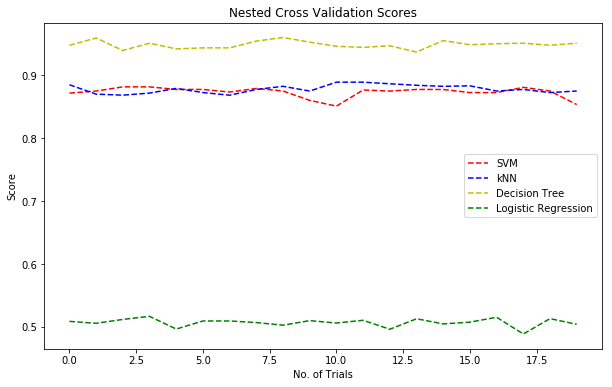

In [98]:
## Plot scores on each trial for nested CV

## Set the figure size    
plt.figure(figsize= (10, 6))

## Plot nested scores for each classifier - quickly visual the best performing model
## This is WITHOUT having changed any of the default parameters
plt.plot(nested_scores_svm, 'r--', label = "SVM")
plt.plot(nested_scores_clf, 'b--', label = "kNN")
plt.plot(nested_scores_dt, 'y--', label = "Decision Tree")
plt.plot(nested_scores_lr, 'g--', label = "Logistic Regression")

## Give some labels
plt.xlabel("No. of Trials")
plt.ylabel("Score")

## Title and legend
plt.title("Nested Cross Validation Scores")
plt.legend(loc = 'center right')

## Show the graph
plt.show()

As with the previous analysis, I used *nested cross validation* to give me a sense of how different models would perform, with the data encoded using OneHotEncoder (which made the data set very wide) and the target variable mapped to a dictionary of different numeric values (so the models are able to process the data).<br>

Based on the plot above, the best performing model was a Decision Tree algorithm.  Intuitively, this makes a lot of sense; because we expanded the data set and transformed each feature so that they were binary classifications, the DT has a lot of branches to expand and mine for information.

In [99]:
## Let's test for different criteria in our model so we can tune this before running it
## on the full data
param_grid = {"criterion": ["gini", "entropy"],
             "splitter": ["best", "random"],
             "max_depth": range(1, 15),
             "random_state": [42]
             }

## Use gridsearch to test all versions of the model, with 1000 fits.
dt_gscv = GridSearchCV(dt, param_grid, cv = 10)

## fit model to our training data
dt_gscv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 15), 'random_state': [42],
  

In [100]:
## Get our best params and their scores
print(dt_gscv.best_params_)
print()

## Print out how well it performed using the best params
print(dt_gscv.best_score_)

## save our best params so we can use them in our actual DT model!
best_dt_params = dt_gscv.best_params_

{'criterion': 'entropy', 'max_depth': 13, 'random_state': 42, 'splitter': 'random'}

0.9718775847808105


In [101]:
# We start with initializing our DecisionTree classifier with the best params based on our GridSearch. 
clf = tree.DecisionTreeClassifier(**best_dt_params)

## Train the model (fit the data)
# 'fit' builds a decision tree from the training set (X, y).
clf = clf.fit(X_train, y_train)

In [102]:
## Evaluate performance by cross-validation
scores = cross_val_score(clf, X_train, y_train, cv = 10)
print(scores)

# The mean score and the 95% confidence interval of our scores:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.98360656 0.98360656 0.95901639 0.98360656 0.97540984 0.97520661
 0.95867769 0.94166667 0.98319328 0.97457627]
Accuracy: 0.97 (+/- 0.03)


In [103]:
## Build a confusion matrix from our Decision Tree model - we want to see how accurate it is

## Try to predict the outcomes on our test data
predicted = clf.predict(X_test)

## Compare that with our ACTUAL values from the test data set
matrix = confusion_matrix(y_test, predicted)
print(matrix)
print()

## Create a report to show our precision(accuracy), recall, and f1 for predictions
report = classification_report(y_test, predicted)
print(report)

[[361   2   0   0]
 [  4 110   1   0]
 [  0   4  17   0]
 [  0   1   0  19]]

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       363
           1       0.94      0.96      0.95       115
           2       0.94      0.81      0.87        21
           3       1.00      0.95      0.97        20

    accuracy                           0.98       519
   macro avg       0.97      0.93      0.95       519
weighted avg       0.98      0.98      0.98       519



Here is how the model performed for each class:

0 *(unacceptable)* - 99% precision, 99% recall<br>
1 *(acceptable)* - 94% precision, 96% recall<br>
2 *(good)* - 94% precision, 81% recall<br>
3 *(very good)* - 100% precision, 95% recall<br>

***Interpretation***: What this tells me is that the Decision Tree Algorithm does well identifying cars that are *unacceptable* and *very good*, but has some challenges with cars that are *acceptable*; it also has challenges with mischaracterizing *good* cars, as observed by the 81% recall (which means there are a lot of false "negatives" where the car is being identified incorrectly.  Now to see how our other model performs.

# 3.  Develop model with features as ordinal values

In [104]:
## I will now run through the same processing steps as above, encoding the features differently
## selecting a model, and then compare with my Decision Tree above

In [12]:
## Create an instance of the OrdinalEncoder
encoder = ce.OrdinalEncoder()

## Transform my ENTIRE dataframe because even my target 'class' is a categorical
## We may have to change this if the model performs poorly.
cars_ordinal_df = encoder.fit_transform(cars_df[categ_vars])

## We notice that our df is suddenly more manageable in size - so that's a plus
cars_ordinal_df.head()

,buying,maint,lug_boot,safety,doors,persons
0,1,1,1,1,1,1
1,1,1,1,2,1,1
2,1,1,1,3,1,1
3,1,1,2,1,1,1
4,1,1,2,2,1,1


In [13]:
## Just confirming our features df and our target variables are the same length so that we didn't mess anything up
## in the transformation of the data.
print(len(cars_ordinal_df))
print()
print(len(cars_df['class_ordinal']))

1728

1728


In [21]:
cars_ordinal_df.groupby("buying")['doors'].count()

buying
1    432
2    432
3    432
4    432
Name: doors, dtype: int64

In [14]:
## Create a new X var - based on the ordinal features
## y has not changed but I will re-initialize in case I want to run this at a different time than the first model

X = np.array(cars_ordinal_df)

y = np.array(cars_df['class_ordinal'])

In [15]:
## Create splits of the data to starting training models below, 70/30
## Random seed of 42 so that I can reproduce these results
## Stratify the splits because the classes are unbalanced (and I want to do this right!)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=42, stratify = y)

In [16]:
## We have quite a few different models to explore.  Here is where Nested Cross Validation helps choose the correct
## model for performance.

## Initialize different classification techniques - using default values

## Set a number for how many trials to conduct
num_trials = 20

## Create a Support Vector Classifier with "rbf" kernel
svm3 = svm.SVC(kernel = "rbf", gamma = "auto")

## Create a new k-NN Classifier
clf = neighbors.KNeighborsClassifier()

## Create a new DecisionTree Classifier
dt = tree.DecisionTreeClassifier()

## Create a new Linear Regression Model
lr = linear_model.LinearRegression()

In [17]:
## Empty arrays to store scores for classifier
nested_scores_svm = np.zeros(num_trials)
nested_scores_clf = np.zeros(num_trials)
nested_scores_dt = np.zeros(num_trials)
nested_scores_lr = np.zeros(num_trials)

## Loop for each trial
for i in range(num_trials):
    
    ## Run with StratifiedKFold technique because the class distributions are not even
    outer_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state = i)

    ## Nested CV for SVM
    nested_score = cross_val_score(svm3, X = X_train, y = y_train, cv = outer_cv)
    nested_scores_svm[i] = nested_score.mean()
    
    ## Nested CV for kNN
    nested_score = cross_val_score(clf, X = X_train, y = y_train, cv = outer_cv)
    nested_scores_clf[i] = nested_score.mean()
    
    ## Nested CV for Decision Tree
    nested_score = cross_val_score(dt, X = X_train, y = y_train, cv = outer_cv)
    nested_scores_dt[i] = nested_score.mean()
    
    ## Nested CV for Logit Regression
    nested_score = cross_val_score(lr, X = X_train, y = y_train, cv = outer_cv)
    nested_scores_lr[i] = nested_score.mean()

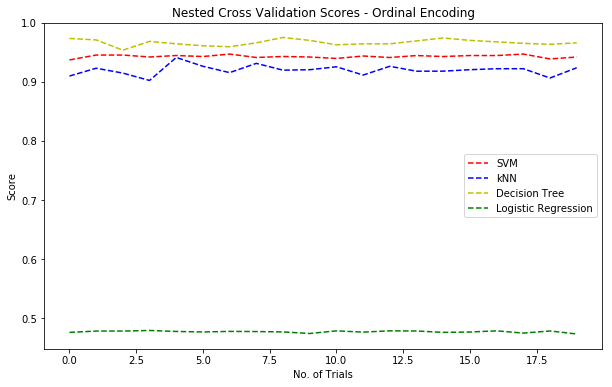

In [18]:
## Plot scores on each trial for nested CV

## Set the figure size    
plt.figure(figsize= (10, 6))

## Plot nested scores for each classifier - quickly visual the best performing model
## This is WITHOUT having changed any of the default parameters
plt.plot(nested_scores_svm, 'r--', label = "SVM")
plt.plot(nested_scores_clf, 'b--', label = "kNN")
plt.plot(nested_scores_dt, 'y--', label = "Decision Tree")
plt.plot(nested_scores_lr, 'g--', label = "Logistic Regression")

## Give some labels
plt.xlabel("No. of Trials")
plt.ylabel("Score")

## Title and legend
plt.title("Nested Cross Validation Scores - Ordinal Encoding")
plt.legend(loc = 'center right')

## Show the graph
plt.show()

Very similar to the plot above - Decision Tree Classification seems to be the best model, regardless of how the features are encoded; however, kNN and Logistic Regression are not that far behind.  We'll run through CV to tune our hyperparameters, and see the results of the Decision Tree model with the new encoding for the features.

In [112]:
## Create a new DecisionTree Classifier
## dt = tree.DecisionTreeClassifier()

## Let's test for different criteria in our model so we can tune this before running it
## on the full data
param_grid = {"criterion": ["gini", "entropy"],
             "splitter": ["best", "random"],
             "max_depth": range(1, 15),
             "random_state": [42]
             }

## Use gridsearch to test all versions of the model, with 1000 fits.
dt_gscv = GridSearchCV(dt, param_grid, cv = 10)

## fit model to our training data
dt_gscv.fit(X_train, y_train)

C:\Python\envs\MSBA2020\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 15), 'random_state': [42],
  

In [113]:
# We start with initializing our DecisionTree classifier with the best params based on our GridSearch. 
clf = tree.DecisionTreeClassifier(**best_dt_params)

## Train the model (fit the data)
# 'fit' builds a decision tree from the training set (X, y).
clf = clf.fit(X_train, y_train)

In [114]:
## Evaluate performance by cross-validation
scores = cross_val_score(clf, X_train, y_train, cv = 10)
print(scores)

# The mean score and the 95% confidence interval of our scores:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.97540984 0.97540984 0.98360656 0.95901639 0.96721311 0.97520661
 0.96694215 0.96666667 0.99159664 0.98305085]
Accuracy: 0.97 (+/- 0.02)


In [115]:
## Build a confusion matrix from our Decision Tree model - we want to see how accurate it is

## Try to predict the outcomes on our test data
predicted = clf.predict(X_test)

## Compare that with our ACTUAL values from the test data set
matrix = confusion_matrix(y_test, predicted)
print(matrix)
print()

## Create a report to show our precision(accuracy), recall, and f1 for predictions
report = classification_report(y_test, predicted)
print(report)

[[357   5   1   0]
 [  2 112   1   0]
 [  2   2  17   0]
 [  0   0   0  20]]

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       363
           1       0.94      0.97      0.96       115
           2       0.89      0.81      0.85        21
           3       1.00      1.00      1.00        20

    accuracy                           0.97       519
   macro avg       0.96      0.94      0.95       519
weighted avg       0.97      0.97      0.97       519



What we see now is that this version of our Decision Tree model performs WORSE when actually running it against our testing data.  Here's how the model performed for each class:<br>

0 *(unacceptable)* - 99% precision, 98% recall <br>
1 *(acceptable)* - 94% precision, 97% recall <br>
2 *(good)* - 89% precision, 81% recall ## -5% here <br>
3 *(very good)* - 100% precision, 100% recall <br>

***Interpretation:*** What this tells me about this particular Decision Tree algorithm is it also does well identifying cars that are *unacceptable* and *very good*, but has more of a challenge with mischaracterizing *good* cars, as observed by the 89% precision score (compared to the model above, which had a 94% precision rating.<br>

What I can conclude from this is that Decision Tree algorithms perform much better when there are multiple features for it to choose from, since it can branch out further to make its determinations.  For a future analysis, I will try using a SVM on this data set to see if it performs better.  Thank you for reading!